In [1]:
import psycopg2
import os
import sys
import pandas as pd
import pandas.io.sql as sqlio
import datetime
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt

In [2]:
from pipeline import populate_dwh

## Search "ChatGPT" tweets pulished on yesterday

In [3]:
redshift = {'DWH_DB_USER':os.environ['DWH_DB_USER'],
    'DWH_DB_PASSWORD':os.environ['DWH_DB_PASSWORD'],
    'DWH_ENDPOINT':os.environ['DWH_ENDPOINT'],
    'DWH_PORT':'5439',
    'DWH_DB':'dev',
    'DWH_IAM_ROLE': os.environ['DWH_IAM_ROLE']}

In [4]:
date = datetime.datetime.today() - datetime.timedelta(days = 2)
keyword = 'ChatGPT'
populate_dwh(keyword,date,max_page = 50)

Requesting page# 1 ...
Requesting page# 2 ...
Requesting page# 3 ...
Requesting page# 4 ...
Requesting page# 5 ...
Requesting page# 6 ...
Requesting page# 7 ...
Requesting page# 8 ...
Requesting page# 9 ...
Requesting page# 10 ...
Requesting page# 11 ...
Requesting page# 12 ...
Requesting page# 13 ...
Requesting page# 14 ...
Requesting page# 15 ...
Requesting page# 16 ...
Requesting page# 17 ...
Requesting page# 18 ...
Requesting page# 19 ...
Requesting page# 20 ...
Requesting page# 21 ...
Requesting page# 22 ...
Requesting page# 23 ...
Requesting page# 24 ...
Requesting page# 25 ...
Requesting page# 26 ...
Requesting page# 27 ...
Requesting page# 28 ...
Requesting page# 29 ...
Requesting page# 30 ...
Requesting page# 31 ...
Requesting page# 32 ...
Requesting page# 33 ...
Requesting page# 34 ...
Requesting page# 35 ...
Requesting page# 36 ...
Requesting page# 37 ...
Requesting page# 38 ...
Requesting page# 39 ...
Requesting page# 40 ...
Requesting page# 41 ...
Requesting page# 42 ...
R

## Check load results

In [5]:
conn_string = "postgresql://{}:{}@{}:{}/{}".format(redshift['DWH_DB_USER'], redshift['DWH_DB_PASSWORD'], redshift['DWH_ENDPOINT'], redshift['DWH_PORT'],redshift['DWH_DB'])
con = psycopg2.connect(conn_string)

In [6]:
tweet_cnt = sqlio.read_sql_query(f"select distinct keyword_date, count(1) from mapping_table group by keyword_date", con)
tweet_cnt

/var/folders/th/flmj2p9x5s12x8nk19d3zbwr0000gn/T/ipykernel_27098/4265129869.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tweet_cnt = sqlio.read_sql_query(f"select distinct keyword_date, count(1) from mapping_table group by keyword_date", con)


,keyword_date,count
0,ChatGPT_2023-02-20,1672
1,ChatGPT_2023-02-19,3805


## Get corresponding from facts table

In [10]:
#fact table
query = f'''
SELECT * FROM fact_tweets t1
join (
select tweet_id from mapping_table where keyword_date = 'ChatGPT_2023-02-20' or keyword_date = 'ChatGPT_2023-02-19' GROUP BY tweet_id
) t2
on t1.tweet_id = t2.tweet_id
'''
fact_tweets = sqlio.read_sql_query(query, con)
fact_tweets.head()

/var/folders/th/flmj2p9x5s12x8nk19d3zbwr0000gn/T/ipykernel_27098/2574014961.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_tweets = sqlio.read_sql_query(query, con)


,tweet_id,possibly_sensitive,dt,geo_id,user_id,is_edited,text,retweet_cnt,reply_cnt,like_cnt,quote_cnt,impression_cnt,tweet_id
0,1627492796465651712,False,2023-02-20 02:18:14,None,410864661,False,"Are shiba inu whales , ethereum and Bitcoin wh...",0,0,0,0,0,1627492796465651712
1,1627492684108800002,False,2023-02-20 02:17:47,None,17241531,False,These out of control Bing / ChatGPT conversati...,0,0,0,0,5,1627492684108800002
2,1627492621210755073,False,2023-02-20 02:17:32,None,410864661,False,"Are shiba inu whales , ethereum and Bitcoin wh...",0,0,0,0,2,1627492621210755073
3,1627492506358226944,False,2023-02-20 02:17:05,None,972416712082571264,False,https://t.co/wL0RJ5du0b\n\nWhile there is no d...,0,0,0,0,4,1627492506358226944
4,1627492504785539074,False,2023-02-20 02:17:05,None,1618849917400924161,False,Experience Intelligent Illumination with AI Sm...,0,0,0,0,6,1627492504785539074


## How many tweets are sensitive

In [11]:
fact_tweets.possibly_sensitive.value_counts()

False    4936
True       42
Name: possibly_sensitive, dtype: int64

## Most popular tweets

In [12]:
fact_tweets.sort_values(by = 'impression_cnt', ascending = False).head(10)

,tweet_id,possibly_sensitive,dt,geo_id,user_id,is_edited,text,retweet_cnt,reply_cnt,like_cnt,quote_cnt,impression_cnt,tweet_id
2290,1627362654472871936,False,2023-02-19 17:41:06,None,807095,False,See why a very strange conversation with Micro...,49,60,222,25,318296,1627362654472871936
1136,1627428979333373955,False,2023-02-19 22:04:39,None,16076032,False,"Oh, please leave it alone. It sounds so much b...",181,61,1581,5,297880,1627428979333373955
2144,1627371184894447616,False,2023-02-19 18:15:00,None,1652541,False,ICYMI: ChatGPT surpassed 100 million monthly a...,17,7,68,4,87173,1627371184894447616
4499,1627381343834501120,False,2023-02-19 18:55:22,None,816009850576519169,False,I fed years of Sneaker Twitter tweets to ChatG...,27,26,141,14,70172,1627381343834501120
3428,1627431582821670917,False,2023-02-19 22:15:00,None,1652541,False,ICYMI: ChatGPT is now the fastest-growing cons...,23,7,45,7,68937,1627431582821670917
2022,1627392146864222208,False,2023-02-19 19:38:17,None,1422036552922767363,False,"On Feb 29, 2023, the market will crash. We wil...",6,86,247,2,67759,1627392146864222208
4818,1627363658333315073,False,2023-02-19 17:45:05,None,34713362,False,Right-wing commentators are recycling their ol...,13,38,33,3,67696,1627363658333315073
4229,1627383265068711936,False,2023-02-19 19:03:00,None,14293310,False,Here's how ChatGPT managed to grow faster than...,15,6,38,3,59371,1627383265068711936
4120,1627402681265405958,False,2023-02-19 20:20:09,None,786309892990574592,False,Me: “You won’t comment on the corruption of th...,90,24,426,3,54659,1627402681265405958
1945,1627383018456330242,False,2023-02-19 19:02:01,None,14173315,False,Nearly 4 in 10 Americans said they were more c...,15,34,56,5,52008,1627383018456330242


## Distribution of impression count

(array([2.757e+03, 7.310e+02, 3.510e+02, 1.820e+02, 1.290e+02, 9.700e+01,
        6.800e+01, 4.700e+01, 4.600e+01, 2.900e+01, 3.000e+01, 2.200e+01,
        1.900e+01, 2.900e+01, 1.500e+01, 9.000e+00, 1.400e+01, 1.300e+01,
        8.000e+00, 1.500e+01, 1.300e+01, 1.200e+01, 9.000e+00, 1.000e+01,
        1.200e+01, 1.200e+01, 9.000e+00, 9.000e+00, 5.000e+00, 9.000e+00,
        7.000e+00, 5.000e+00, 1.200e+01, 7.000e+00, 4.000e+00, 6.000e+00,
        5.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        5.000e+00, 3.000e+00]),
 array([   0.  ,   39.18,   78.36,  117.54,  156.72,  195.9 ,  235.08,
         274.26,  313.44,  352.62,  391.8 ,  430.98,  470.16,  509.34,
         548.52,  587.7 ,  626.88,  666.06,  705.24,  744.42,  783.6 ,
         822.78,  861.96,  901.14,  940.32,  979.5 , 1018.68, 1057.86,
        1097.04, 1136.22, 1175.4 , 1214.58, 1253.76, 1292.94, 1332.12,
        1371.3 , 1410

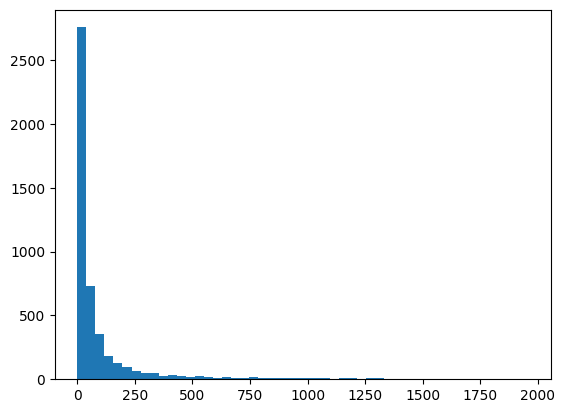

In [13]:
plt.hist(fact_tweets['impression_cnt'][fact_tweets['impression_cnt']<2000],bins = 50)

## Distribution of tweets length

(array([  6.,  18.,  14.,  44.,  62.,  95.,  88., 130., 151.,  97., 195.,
        185., 182., 150., 182., 146., 153., 147., 121., 155., 111., 116.,
         78., 100., 100., 125., 101.,  69.,  70.,  71.,  59.,  62., 145.,
        148., 110., 105.,  96.,  85.,  64., 144., 157., 217.,  57.,  50.,
        138.,  51.,   9.,   4.,  14.,   1.]),
 array([  8.  ,  14.56,  21.12,  27.68,  34.24,  40.8 ,  47.36,  53.92,
         60.48,  67.04,  73.6 ,  80.16,  86.72,  93.28,  99.84, 106.4 ,
        112.96, 119.52, 126.08, 132.64, 139.2 , 145.76, 152.32, 158.88,
        165.44, 172.  , 178.56, 185.12, 191.68, 198.24, 204.8 , 211.36,
        217.92, 224.48, 231.04, 237.6 , 244.16, 250.72, 257.28, 263.84,
        270.4 , 276.96, 283.52, 290.08, 296.64, 303.2 , 309.76, 316.32,
        322.88, 329.44, 336.  ]),
 <BarContainer object of 50 artists>)

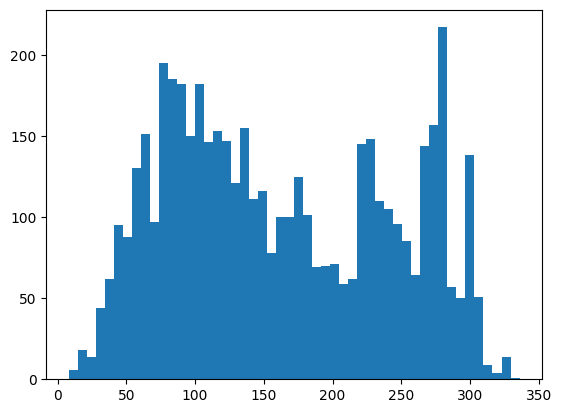

In [14]:
fact_tweets['len'] = fact_tweets['text'].str.len()
plt.hist(fact_tweets['len'],bins = 50)

## User_locations

In [15]:
query = '''
SELECT t2.user_location,count(t1.tweet_id) as cnt
from fact_tweets t1
join dim_users t2 on t1.user_id = t2.user_id
group by t2.user_location
'''
location_cnt = sqlio.read_sql_query(query, con)
location_cnt.sort_values(by = 'cnt', ascending = False).head(10)

/var/folders/th/flmj2p9x5s12x8nk19d3zbwr0000gn/T/ipykernel_27098/696295492.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  location_cnt = sqlio.read_sql_query(query, con)


,user_location,cnt
832,None,3399
941,"Ajmer, India",100
876,United States,86
842,"Camp Hill, PA",63
191,"Campinas, SP, Brazil",49
951,India,48
48,UK,47
871,Universe,42
21,Everywhere,40
829,United Kingdom,38


## Sentiment Analysis

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
fact_tweets['pos_score'] = fact_tweets['text'].apply(lambda x: sia.polarity_scores(x)['pos'])
fact_tweets['neg_score'] = fact_tweets['text'].apply(lambda x: sia.polarity_scores(x)['neg'])

(array([3.45e+03, 1.90e+01, 8.40e+01, 1.58e+02, 1.27e+02, 1.12e+02,
        1.19e+02, 9.20e+01, 1.29e+02, 7.90e+01, 8.40e+01, 8.80e+01,
        6.00e+01, 6.10e+01, 6.80e+01, 4.10e+01, 3.10e+01, 2.40e+01,
        1.90e+01, 2.40e+01, 1.00e+01, 1.70e+01, 8.00e+00, 1.20e+01,
        7.00e+00, 4.00e+00, 7.00e+00, 9.00e+00, 1.00e+00, 3.00e+00,
        4.00e+00, 7.00e+00, 5.00e+00, 4.00e+00, 2.00e+00, 1.00e+00,
        2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.     , 0.01546, 0.03092, 0.04638, 0.06184, 0.0773 , 0.09276,
        0.10822, 0.12368, 0.13914, 0.1546 , 0.17006, 0.18552, 0.20098,
        0.21644, 0.2319 , 0.24736, 0.26282, 0.27828, 0.29374, 0.3092 ,
        0.32466, 0.34012, 0.35558, 0.37104, 0.3865 , 0.40196, 0.41742,
        0.43288, 0.44834, 0.4638 , 0.47926, 0.49472, 0.51018, 0.52564,
        0.5411 , 0.55656, 0.57202, 0.58748, 0.60294, 0.6184 , 0.63386,


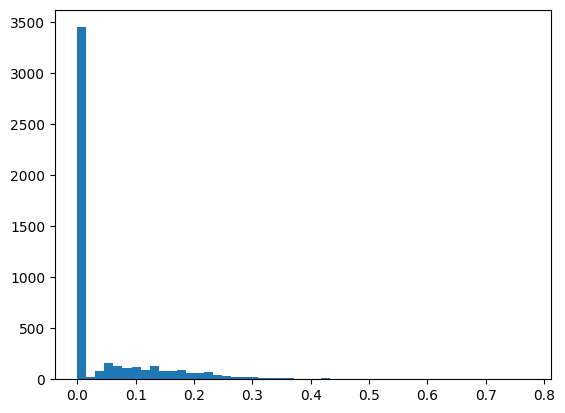

In [17]:
plt.hist(fact_tweets['neg_score'],bins = 50)

(array([2.114e+03, 1.700e+01, 8.900e+01, 1.990e+02, 2.660e+02, 2.700e+02,
        2.120e+02, 2.410e+02, 2.830e+02, 1.850e+02, 1.620e+02, 1.540e+02,
        1.090e+02, 9.600e+01, 9.400e+01, 8.000e+01, 5.900e+01, 5.400e+01,
        8.800e+01, 3.500e+01, 4.200e+01, 2.300e+01, 1.600e+01, 2.200e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 7.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.     , 0.01788, 0.03576, 0.05364, 0.07152, 0.0894 , 0.10728,
        0.12516, 0.14304, 0.16092, 0.1788 , 0.19668, 0.21456, 0.23244,
        0.25032, 0.2682 , 0.28608, 0.30396, 0.32184, 0.33972, 0.3576 ,
        0.37548, 0.39336, 0.41124, 0.42912, 0.447  , 0.46488, 0.48276,
        0.50064, 0.51852, 0.5364 , 0.55428, 0.57216, 0.59004, 0.60792,
        0.6258 , 0.64

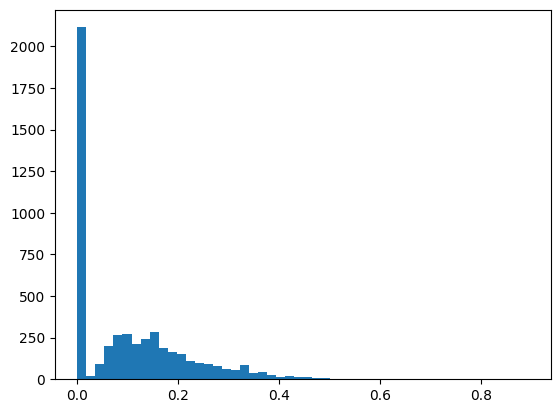

In [18]:
plt.hist(fact_tweets['pos_score'],bins = 50)